In [1]:
%matplotlib inline

In [57]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten
from keras.datasets import mnist
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def reshape_channel_first(*images):
    return (i.reshape(i.shape[0], 1, *i.shape[1:])
            for i in images)

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = reshape_channel_first(x_train/ 255.0, x_test/ 255.0)

print('type\t\t', x_train.dtype)
print('x_train.shape\t', x_train.shape)
print('x_test.shape\t', x_test.shape)
print('y_train.shape\t', y_train.shape)
print('y_test.shape\t', y_test.shape)

type		 float64
x_train.shape	 (60000, 1, 28, 28)
x_test.shape	 (10000, 1, 28, 28)
y_train.shape	 (60000,)
y_test.shape	 (10000,)


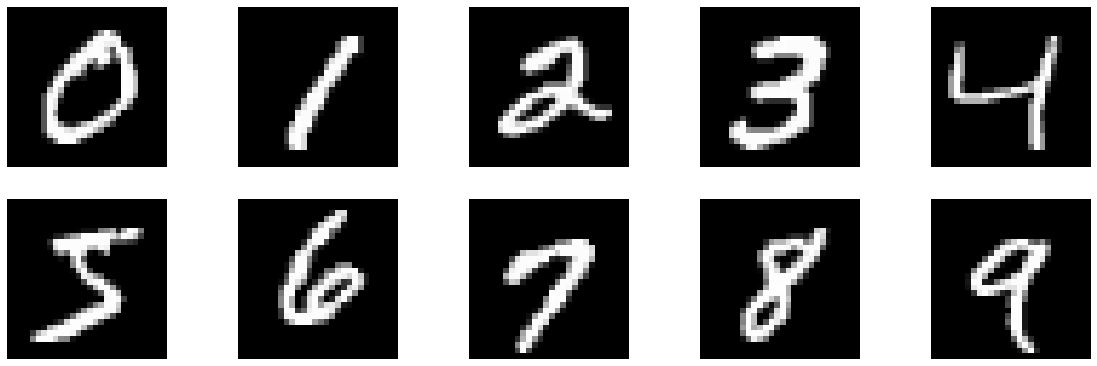

In [21]:
def show_grayscale_images(images, columns=5, **figure_kwargs):
    plt.figure(**figure_kwargs)
    columns = 5
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image[0], cmap='gray')
        plt.axis('off')
        
images = x_train[[(y_train == i).argmax() for i in range(10)]][:10]
show_grayscale_images(images, figsize=(20,10))

In [ ]:
%%time

model = Sequential([
    Conv2D(filters=32, 
           kernel_size=(3, 3), 
           activation='relu',
           data_format='channels_first',
           input_shape=x_train[0].shape),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              
              # like categorical_crossentropy but for 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    batch_size=1_000, 
                    epochs=5, 
                    verbose=1);

df_history = pd.DataFrame(history.history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 26, 26)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 13, 26)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.8794 - acc: 0.7917 - val_loss: 0.3560 - val_acc: 0.9007
Epoch 2/5
37000/60000 [=================>............] - ETA: 2s - loss: 0.3346 - a

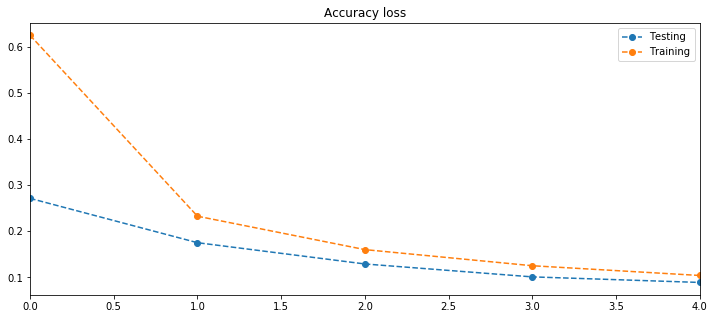

In [90]:
(df_history
 [['val_loss', 'loss']]
 .rename(columns={'val_loss': 'Testing', 'loss': 'Training'})
 .plot(style='o--', figsize=(12, 5), title='Accuracy loss'));

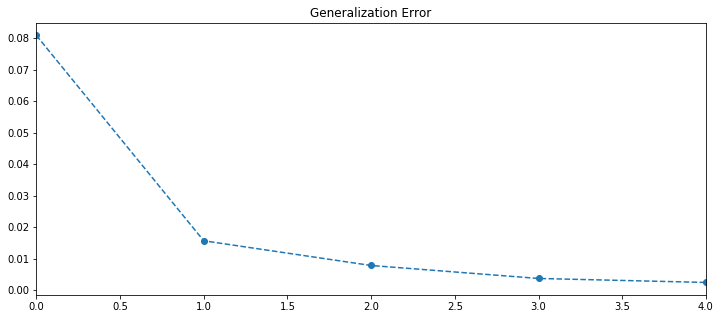

In [91]:
((df_history['val_acc'] - df_history['acc'])
 .plot(style='o--', figsize=(12, 5), title='Generalization Error'));